In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## A peek at the dataset 

In [7]:
#snippet of the data set

df = pd.read_csv('cosmetics.csv')
df.head(10)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1,1,1,1,0
7,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72,4.4,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1,1,1,1,0
8,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",1,1,1,1,1
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0


In [8]:
#shows basic stats of data set such as mean, median, std, 25%, 50%, 75%, max, & min of each row
df.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.iloc[:,1]
#extracts the brand name column

0                              LA MER
1                               SK-II
2                      DRUNK ELEPHANT
3                              LA MER
4                        IT COSMETICS
                    ...              
1467                           KORRES
1468                  KATE SOMERVILLE
1469                    VITA LIBERATA
1470    ST. TROPEZ TANNING ESSENTIALS
1471                       DERMAFLASH
Name: Brand, Length: 1472, dtype: object

In [10]:
df.iloc[:,5]
#extracts the ingredents column

0       Algae (Seaweed) Extract, Mineral Oil, Petrolat...
1       Galactomyces Ferment Filtrate (Pitera), Butyle...
2       Water, Dicaprylyl Carbonate, Glycerin, Ceteary...
3       Algae (Seaweed) Extract, Cyclopentasiloxane, P...
4       Water, Snail Secretion Filtrate, Phenyl Trimet...
                              ...                        
1467    Water, Alcohol Denat., Potassium Cetyl Phospha...
1468    Water, Isododecane, Dimethicone, Butyloctyl Sa...
1469    Water, Dihydroxyacetone, Glycerin, Sclerocarya...
1470    Water, Dihydroxyacetone, Propylene Glycol, PPG...
1471                        Visit the DERMAFLASH boutique
Name: Ingredients, Length: 1472, dtype: object

In [11]:
print(df['Brand'].where(df['Rank'] < 4))
#printing the products that have more than 4 stars rating

0                                 NaN
1                                 NaN
2                                 NaN
3                              LA MER
4                                 NaN
                    ...              
1467                           KORRES
1468                  KATE SOMERVILLE
1469                    VITA LIBERATA
1470    ST. TROPEZ TANNING ESSENTIALS
1471                       DERMAFLASH
Name: Brand, Length: 1472, dtype: object


In [12]:
#showcasing the variety of brands
print(df.sort_values("Brand", axis=0, ascending=True,inplace=False, na_position='last'))

            Label                Brand  \
710     Treatment             ALGENIST   
662     Treatment             ALGENIST   
826     Treatment             ALGENIST   
1070    Face Mask             ALGENIST   
216   Moisturizer             ALGENIST   
...           ...                  ...   
1149    Eye cream  YOUTH TO THE PEOPLE   
51    Moisturizer  YOUTH TO THE PEOPLE   
115   Moisturizer  YOUTH TO THE PEOPLE   
326      Cleanser  YOUTH TO THE PEOPLE   
1284    Eye cream   YVES SAINT LAURENT   

                                                   Name  Price  Rank  \
710         GENIUS Ultimate Anti-Aging Vitamin C+ Serum    118   3.9   
662                      ELEVATE Advanced Retinol Serum     98   4.8   
826              ELEVATE Advanced Lift Contouring Cream     96   4.3   
1070  SPLASH Absolute Hydration Replenishing Sleepin...     48   3.6   
216   SUBLIME DEFENSE Ultra Lightweight UV Defense F...     28   4.4   
...                                                 ...    ... 

In [13]:
df.sort_values('Brand', ascending=True)
#sorted alphabetically in brand

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
710,Treatment,ALGENIST,GENIUS Ultimate Anti-Aging Vitamin C+ Serum,118,3.9,"Water, Glycerin, Butylene Glycol, 3-O-Ethyl As...",1,1,1,1,1
662,Treatment,ALGENIST,ELEVATE Advanced Retinol Serum,98,4.8,"Water, Dimethicone, Glycerin, Butylene Glycol,...",1,1,1,0,0
826,Treatment,ALGENIST,ELEVATE Advanced Lift Contouring Cream,96,4.3,"Water, Dimethicone, Dimethicone Crosspolymer, ...",1,1,1,1,1
1070,Face Mask,ALGENIST,SPLASH Absolute Hydration Replenishing Sleepin...,48,3.6,"Water, Butylene Glycol, Dimethicone, Glycerin,...",1,1,1,1,1
216,Moisturizer,ALGENIST,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,28,4.4,"Cyclopentasiloxane, Water, Alcohol Denat., Gly...",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1149,Eye cream,YOUTH TO THE PEOPLE,Superfood Peptide Eye Cream,35,4.0,"Water, Organic Glycerin, Organic Brassica Oler...",1,1,1,1,1
51,Moisturizer,YOUTH TO THE PEOPLE,Adaptogen Deep Moisture Cream,58,4.8,"Purified Water, Helianthus Annuus (Sunflower) ...",1,1,1,1,1
115,Moisturizer,YOUTH TO THE PEOPLE,Superfood Air-Whip Hyaluronic Acid Moisture Cream,48,4.2,"Water, Helianthus Annuus (Sunflower) Seed Oil,...",1,0,1,1,1
326,Cleanser,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0


In [14]:
df.sort_values(by=['Brand', 'Price'], ascending=True)
#sorts 2 values in ascending progress

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
576,Cleanser,ALGENIST,Hydrating Essence Toner,25,4.4,"Water, Butylene Glycol, Sodium PCA, Hamamelis ...",0,0,0,0,0
216,Moisturizer,ALGENIST,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,28,4.4,"Cyclopentasiloxane, Water, Alcohol Denat., Gly...",0,0,0,0,0
514,Cleanser,ALGENIST,Multi-Perfecting Detoxifying Exfoliator,38,4.6,"Water, Caprylic/Capric Triglyceride, Hydroxyet...",0,0,0,0,0
547,Cleanser,ALGENIST,GENIUS Ultimate Anti-Aging Melting Cleanser,38,4.1,"C12-15 Alkyl Benzoate, Ethylhexyl Palmitate, C...",0,0,0,0,0
810,Treatment,ALGENIST,REVEAL Concentrated Color Correcting Drops,38,3.8,"Water, Dimethicone, Mica, Nylon-12, PEG-10 Dim...",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
927,Face Mask,YOUTH TO THE PEOPLE,Superfood Skin Reset Antioxidant Mask,44,4.4,"Water, Kaolin, Organic Glycerin, Organic Brass...",1,1,1,1,1
115,Moisturizer,YOUTH TO THE PEOPLE,Superfood Air-Whip Hyaluronic Acid Moisture Cream,48,4.2,"Water, Helianthus Annuus (Sunflower) Seed Oil,...",1,0,1,1,1
51,Moisturizer,YOUTH TO THE PEOPLE,Adaptogen Deep Moisture Cream,58,4.8,"Purified Water, Helianthus Annuus (Sunflower) ...",1,1,1,1,1
692,Treatment,YOUTH TO THE PEOPLE,Superfood Firm and Brighten Vitamin C Serum,62,3.9,"Water, Lactic Acid, Citric Acid, Malic Acid, G...",1,1,1,1,1


##Visualizing the top 10 brands

<AxesSubplot: >

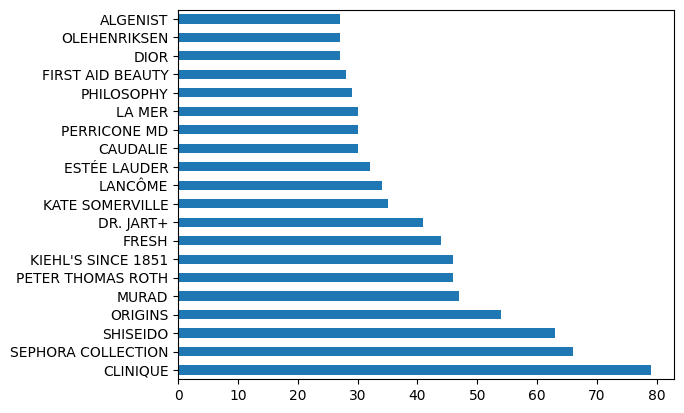

In [15]:
#counting the number of products a certain brand has in this data set
#only using pandas to visualize

df['Brand'].value_counts()

df['Brand'].value_counts()[:20].plot(kind='barh')

<AxesSubplot: ylabel='Brand'>

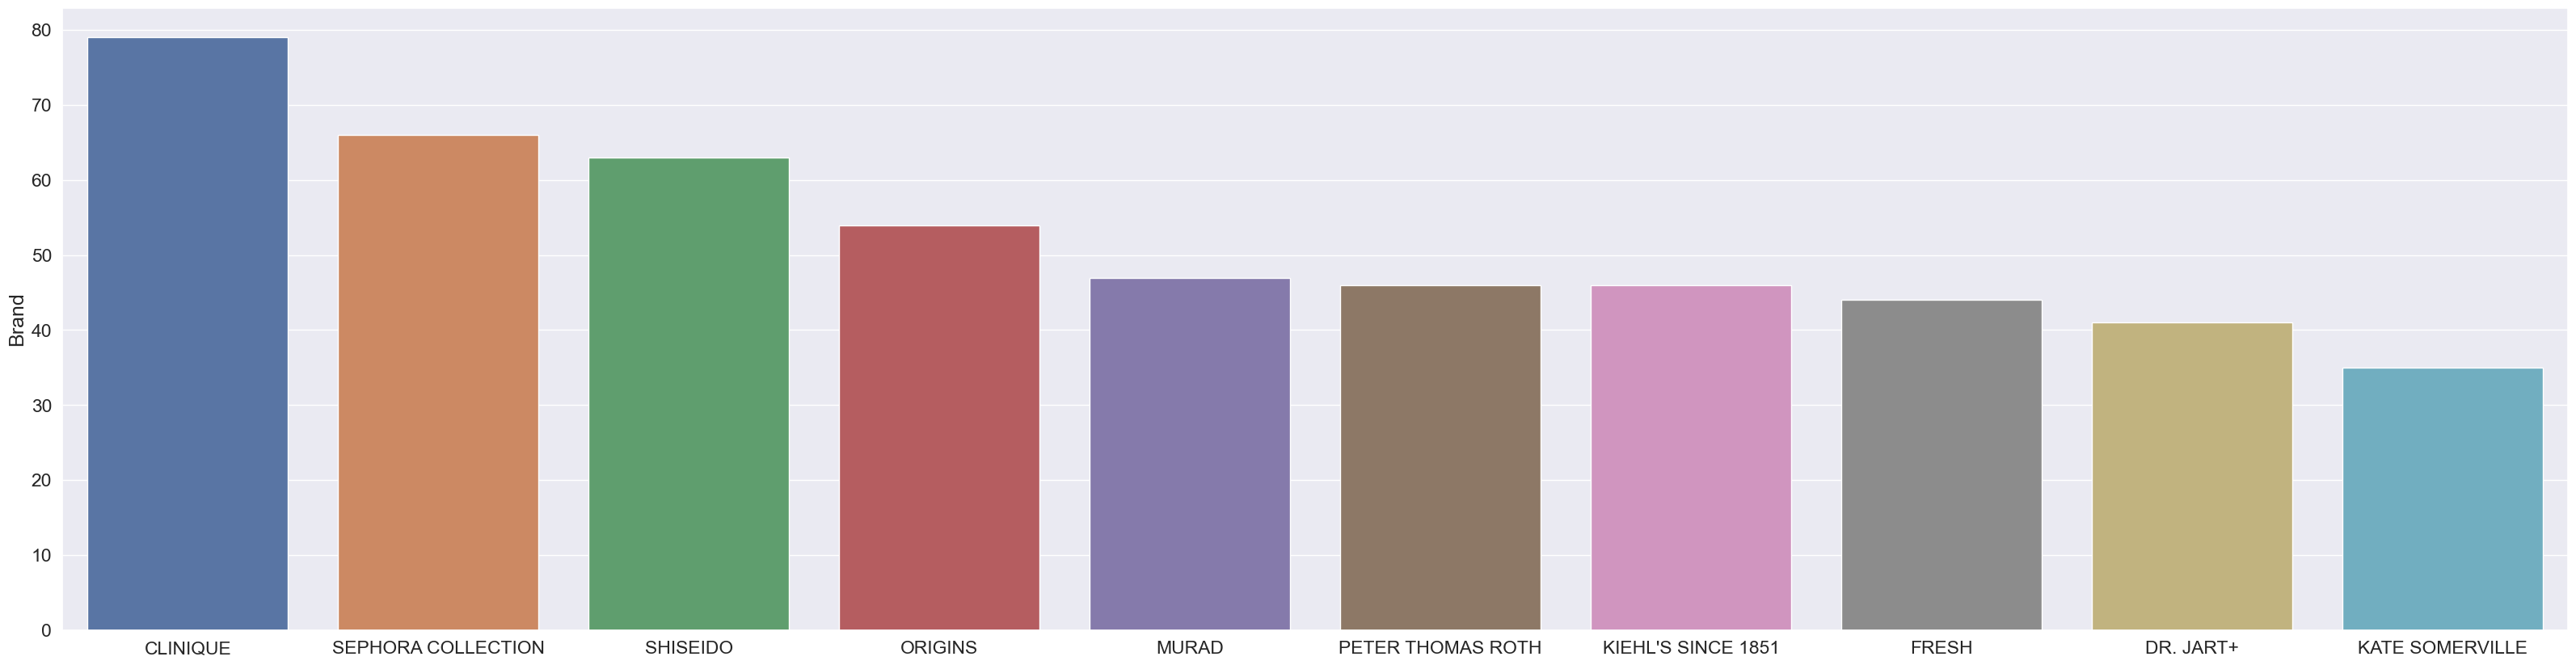

In [40]:
#advantges of graphing in seaborn: ability to manipulate chart style, colors, and sizes
#shows the top 10 brands that occur in this data set


df['Brand'].value_counts()

plt.figure(figsize=(40,10))
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
#sns.color_palette("crest", as_cmap=True)
sns.

sns.barplot(
    x=df['Brand'].value_counts()[:10].index, 
    y=df['Brand'].value_counts()[:10],
    data = df)

## Now we must search the ingredents column for common toxin names

###finding the variables occurances of each toxin in the ingredents column

131
499
1028
29
0
17
0
0
0
7
76
0


<AxesSubplot: >

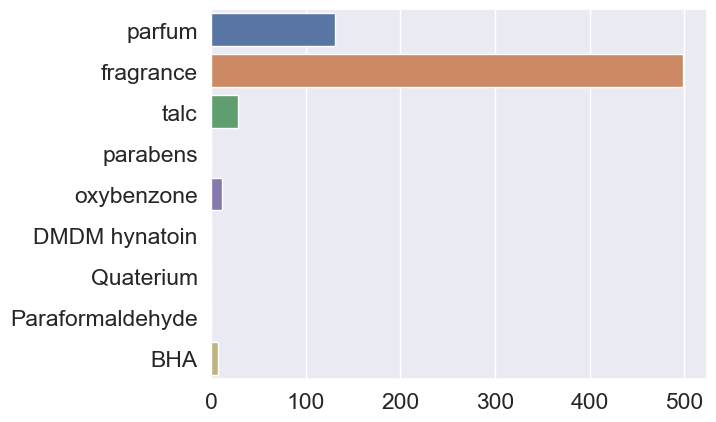

In [45]:


parfum_occ = df[df['Ingredients'].str.contains("Parfum")].shape[0];
fragrance_occ = df[df['Ingredients'].str.contains("Fragrance")].shape[0];
glycol_occ = df[df['Ingredients'].str.contains("Glycol")].shape[0];
talc_occ = df[df['Ingredients'].str.contains("Talc")].shape[0];
parabens_occ = df[df['Ingredients'].str.contains("Parabens")].shape[0];
homosalate_occ = df[df['Ingredients'].str.contains("Homosalate")].shape[0];
oxybenzone_occ = df[df['Ingredients'].str.contains("Oxybenzone")].shape[0]
DMDM_hyantoin_occ = df[df['Ingredients'].str.contains("DMDM hyantoin")].shape[0]
quaterium_occ = df[df['Ingredients'].str.contains("quaterium")].shape[0]
paraformaldehyde_occ = df[df['Ingredients'].str.contains("quaterium")].shape[0]
bha_occ = df[df['Ingredients'].str.contains("BHA")].shape[0]
bht_occ = df[df['Ingredients'].str.contains('BHT')].shape[0]
diethanolamine_occ = df[df['Ingredients'].str.contains('diethanolamine')].shape[0]



print(parfum_occ)
print(fragrance_occ)
print(glycol_occ)
print(talc_occ)
print(parabens_occ)
print(homosalate_occ)
print(DMDM_hyantoin_occ)
print(quaterium_occ)
print(paraformaldehyde_occ)
print(bha_occ)
print(bht_occ)
print(diethanolamine_occ)

#for i in 

# make a new small df that has toxin name, toxin occurence. 
# plot that df 

x = [parfum_occ, fragrance_occ, talc_occ, parabens_occ, oxybenzone_occ, DMDM_hyantoin_occ, quaterium_occ, paraformaldehyde_occ, bha_occ ] 
y = ["parfum", "fragrance", "talc", "parabens", 'oxybenzone', 'DMDM hynatoin', 'Quaterium', 'Paraformaldehyde', 'BHA']
sns.barplot(x=x,y=y)



# plt.show()

#print(df[df['Ingredients'].str.contains("Parfum")].to_string())

# sns.barplot(
#     data = df,
#     x = df['Ingredients'].value_counts()[:5], 
#     y = df['Ingredients'].value_counts()[:5] 
# )

# #print(parfum_occ)
# print("\n")
# #print(fragrance_occ)

# #looking for "parfum" in the ingredents column

In [ ]:
parfum = ['Parfum']

result_df = df[df['Ingredients'].isin(parfum)]

print('\nResult dataframe : \n',
      result_df)

##Plotting the low hazard chemicals

In [29]:
ethanolamine_occ = df[df['Ingredients'].str.contains('Ethanolamine')].shape[0]
oxybenzone_occ = df[df['Ingredients'].str.contains("Oxybenzone")].shape[0]
resorcinol_occ = df[df['Ingredients'].str.contains("Resorcinol")].shape[0]
formaldehyde_occ = df[df['Ingredients'].str.contains("Formaldehyde")].shape[0]
diethanolamine_occ = df[df['Ingredients'].str.contains("Diethanol")].shape[0]
silanes_occ = df[df['Ingredients'].str.contains("Silane")].shape[0]
siloxanes_occ = df[df['Ingredients'].str.contains("Siloxane")].shape[0]
octinaxate_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]





x = [ethanolamine_occ, oxybenzone_occ, resorcinol_occ, formaldehyde_occ, diethanolamine_occ, silanes_occ, siloxanes_occ, octinaxate_occ]
y = ['Ethanolime', 'Oxybenzone', 'Resorcinol', 'Formaldehyde', 'Diethanolmaine', 'Silane', 'Siloxane', 'Octinaxate']
sns.barplot(x,y)

#plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
#phalates
parfum_occ = df[df['Ingredients'].str.contains("Parfum")].shape[0]
fragrance_occ = df[df['Ingredients'].str.contains("Fragrance")].shape[0]

In [ ]:
#graphing the x and y values in readable way
glycol_occ = df.loc[df['Ingredients'].str.contains('Glycol', case = False)]

print(glycol_occ)


sns.barplot(
    data = df,
    x = df['Ingredients'].value_counts()[:10], 
    y = df['Ingredients'].value_counts()[:10].index 
)

plt.show()



In [ ]:
print(parfum_occ)

In [ ]:
glycol_occ = (df['Ingredients'].str.contains('Glycol'))

test1 = 
sns.barplot(
    data = df,
    x=df['Ingredients'].value_counts[:10],
    y=df['Ingredients'].value_counts[:10].index
)

plt.show()

In [ ]:
glycol_occ = df.loc[df['Ingredients'].str.contains('Glycol', case = False)]

print(glycol_occ)